In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('diabetes_capstone.csv')

# Display basic information
print("Dataset Info:")
print(df.info())
print("\
First few rows:")
print(df.head())
print("\
Missing values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class       

In [2]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Encode binary categorical variables
binary_columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
                  'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 
                  'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']

for column in binary_columns:
    df[column] = le.fit_transform(df[column])

# Display the first few rows after encoding
print("First few rows after encoding:")
print(df.head())

First few rows after encoding:
   Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       1         0           1                   0         1   
1   58       1         0           0                   0         1   
2   41       1         1           0                   0         1   
3   45       1         0           0                   1         1   
4   60       1         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1               

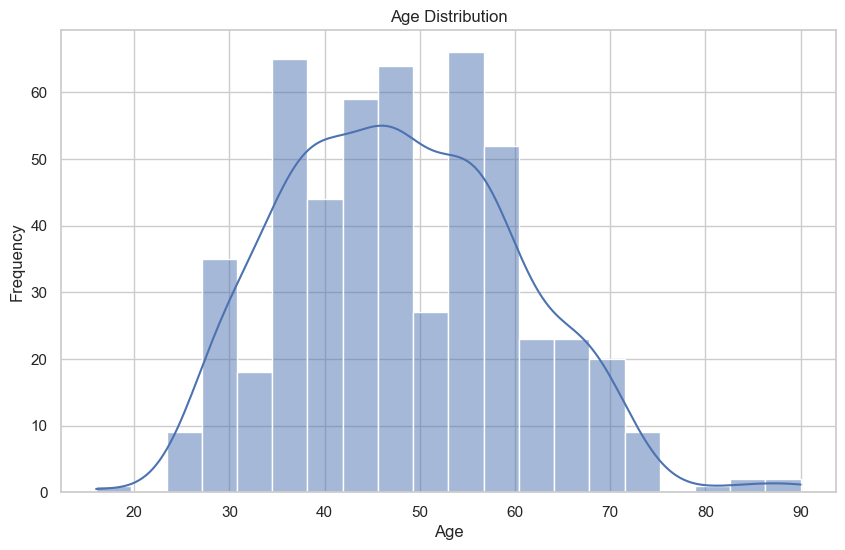

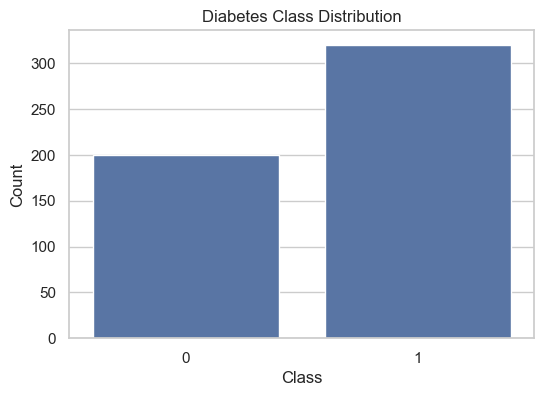

In [3]:
# Exploratory Data Analysis

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the count of diabetes class
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title('Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [4]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         Age    Gender  Polyuria  Polydipsia  \
Age                 1.000000  0.062872  0.199781    0.137382   
Gender              0.062872  1.000000 -0.268894   -0.312262   
Polyuria            0.199781 -0.268894  1.000000    0.598609   
Polydipsia          0.137382 -0.312262  0.598609    1.000000   
sudden weight loss  0.064808 -0.281840  0.447207    0.405965   
weakness            0.224596 -0.124490  0.263000    0.332453   
Polyphagia          0.315577 -0.219968  0.373873    0.316839   
Genital thrush      0.096519  0.208961  0.087273    0.028081   
visual blurring     0.402729 -0.208092  0.235095    0.331250   
Itching             0.296559 -0.052496  0.088289    0.128716   
Irritability        0.201625 -0.013735  0.237740    0.203446   
delayed healing     0.257501 -0.101978  0.149873    0.115691   
partial paresis     0.232742 -0.332288  0.441664    0.442249   
muscle stiffness    0.307703 -0.090542  0.152938    0.180723   
Alopecia            

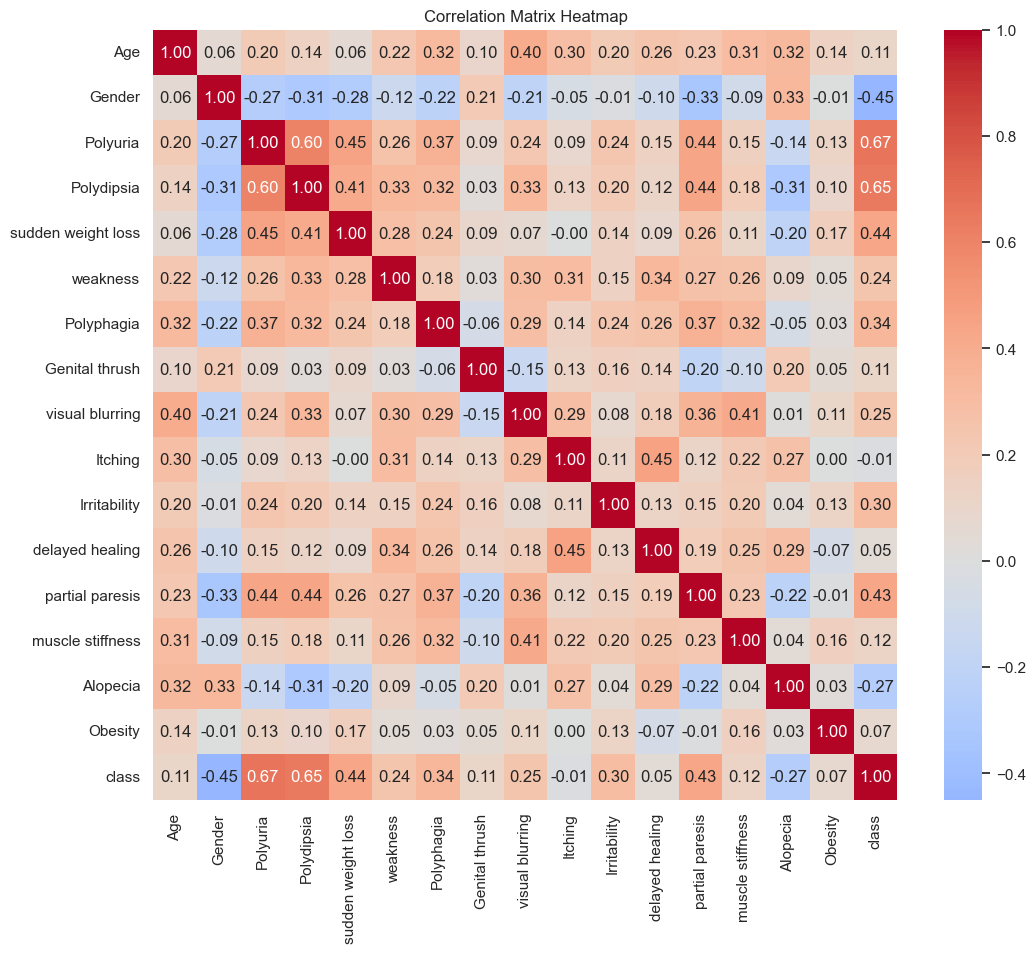

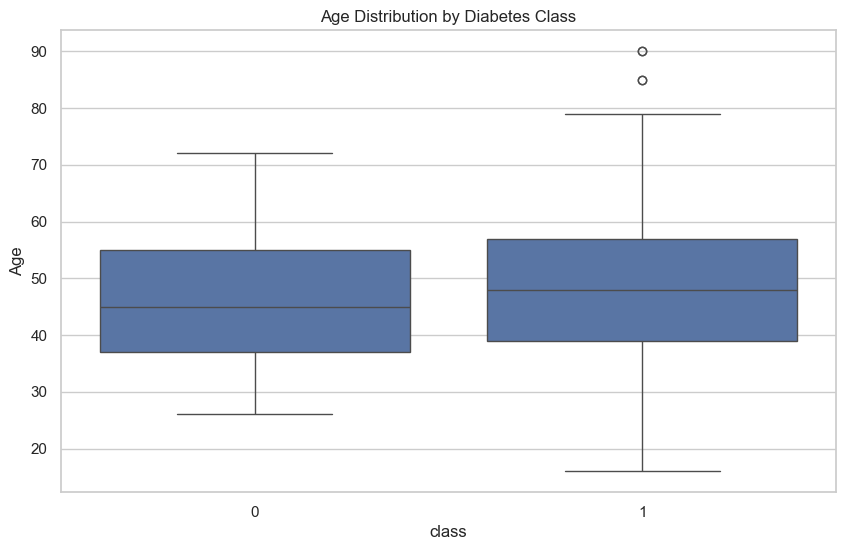

<Figure size 1500x600 with 0 Axes>

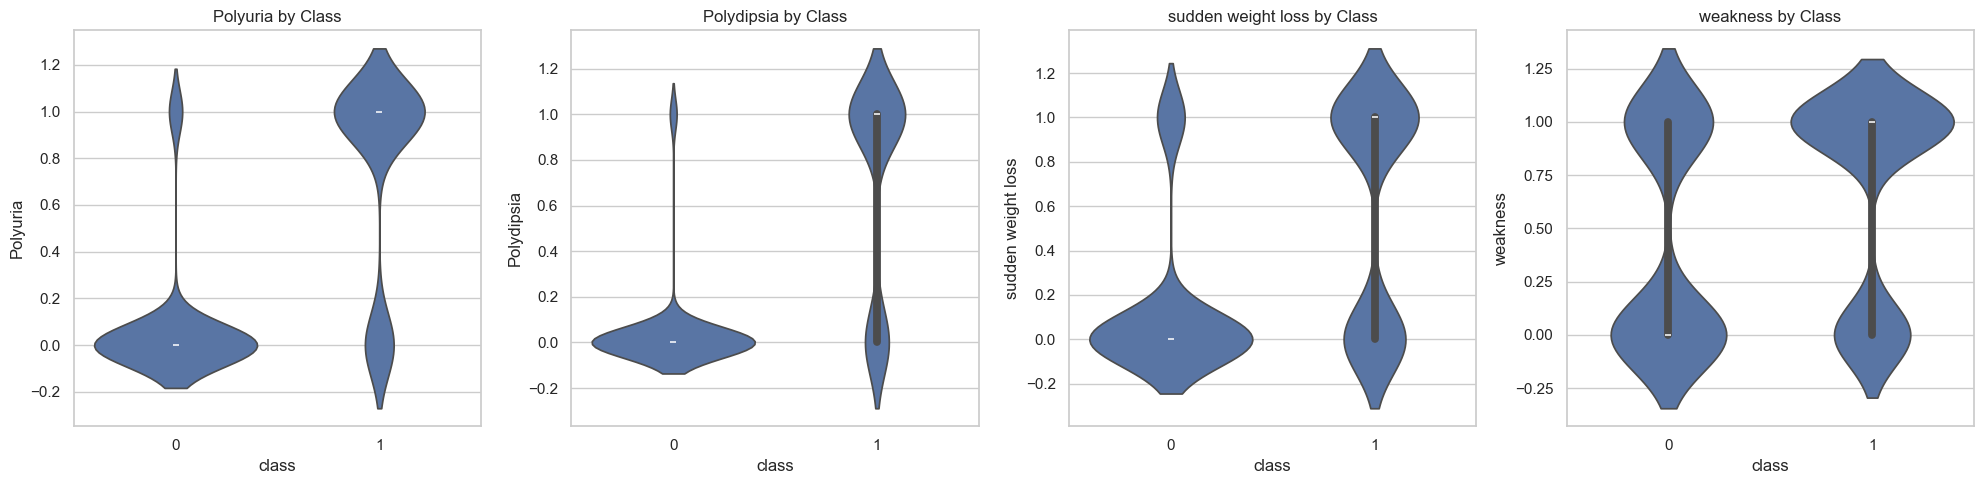

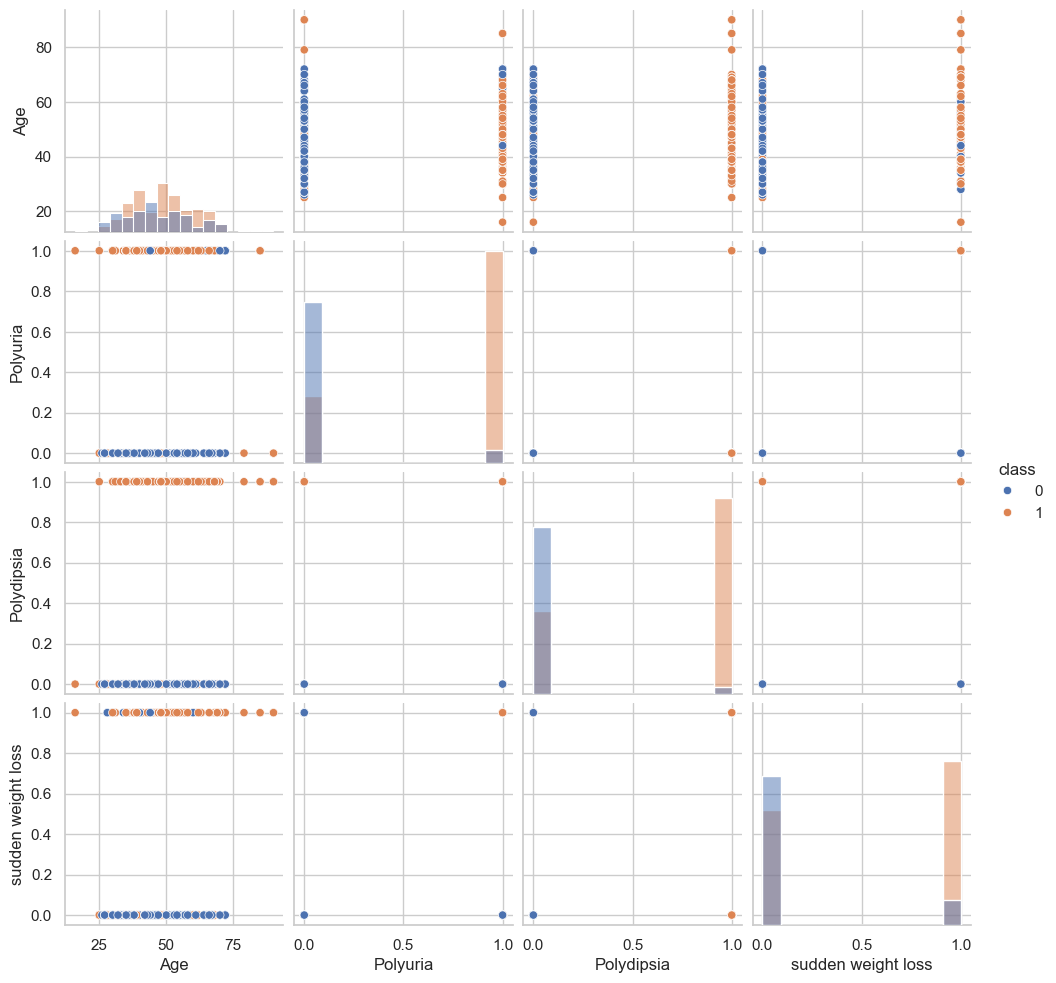

In [5]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Create box plots for Age by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Age', data=df)
plt.title('Age Distribution by Diabetes Class')
plt.show()

# Create violin plots for key symptoms by class
plt.figure(figsize=(15, 6))
symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness']
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, symptom in enumerate(symptoms):
    sns.violinplot(x='class', y=symptom, data=df, ax=axes[i])
    axes[i].set_title(f'{symptom} by Class')
plt.tight_layout()
plt.show()

# Create a pair plot for selected features
selected_features = ['Age', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'class']
sns.pairplot(df[selected_features], hue='class', diag_kind='hist')
plt.show()

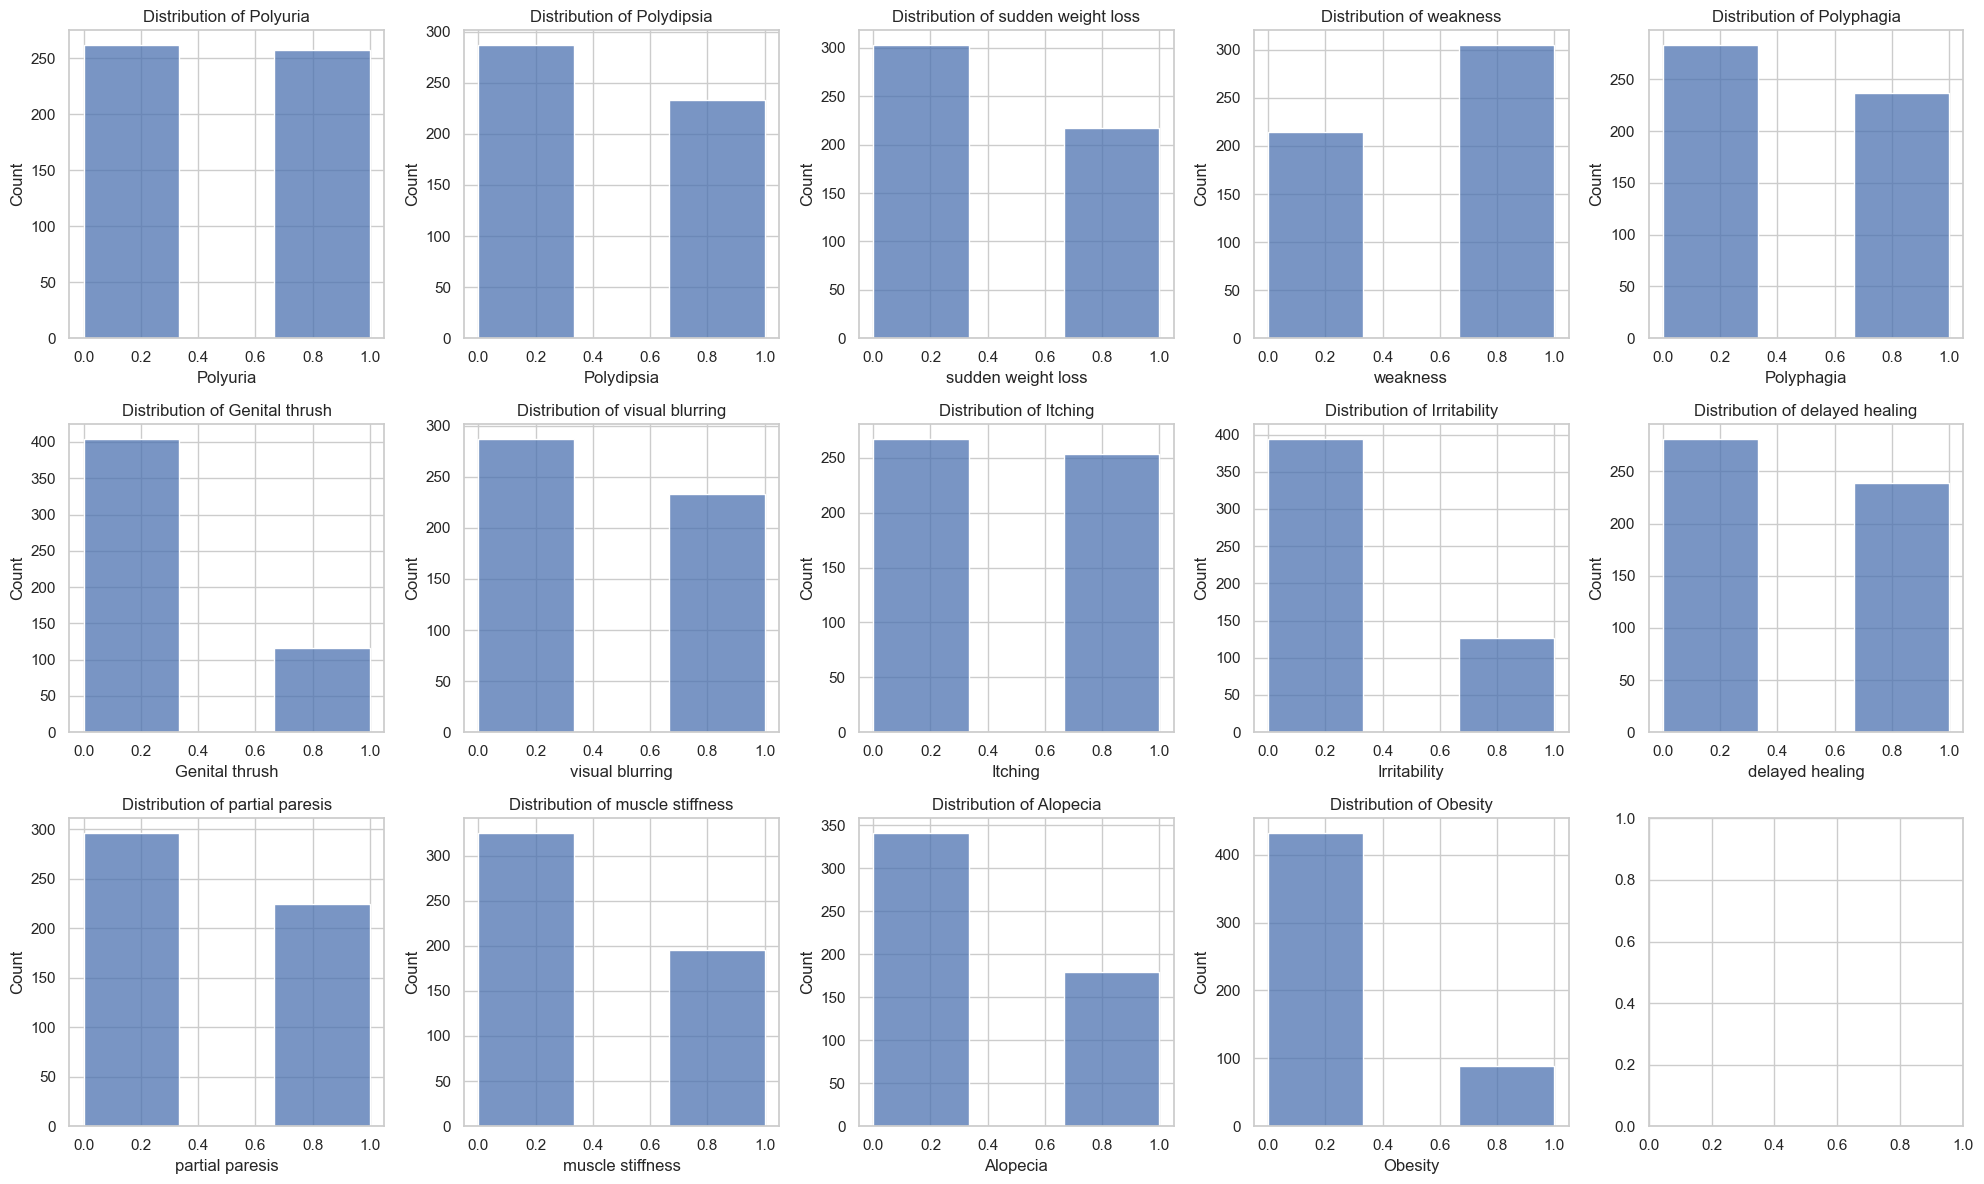

In [6]:
# Create histograms for each symptom
symptoms = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
           'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
           'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.ravel()

for idx, symptom in enumerate(symptoms):
    sns.histplot(data=df, x=symptom, ax=axes[idx], bins=3)
    axes[idx].set_title(f'Distribution of {symptom}')

plt.tight_layout()
plt.show()

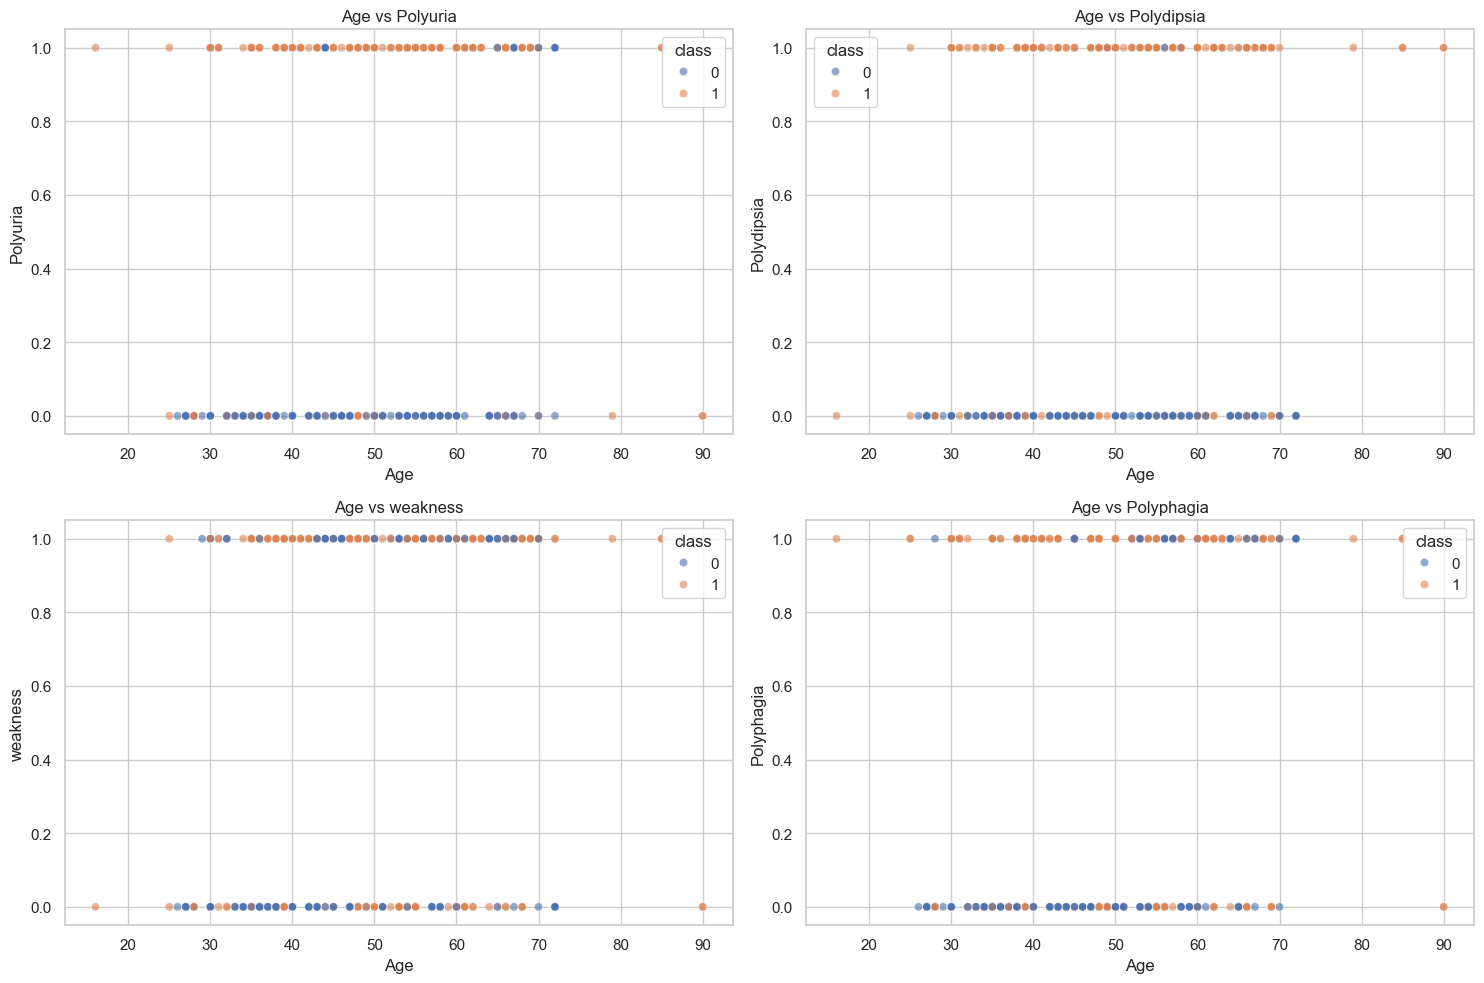

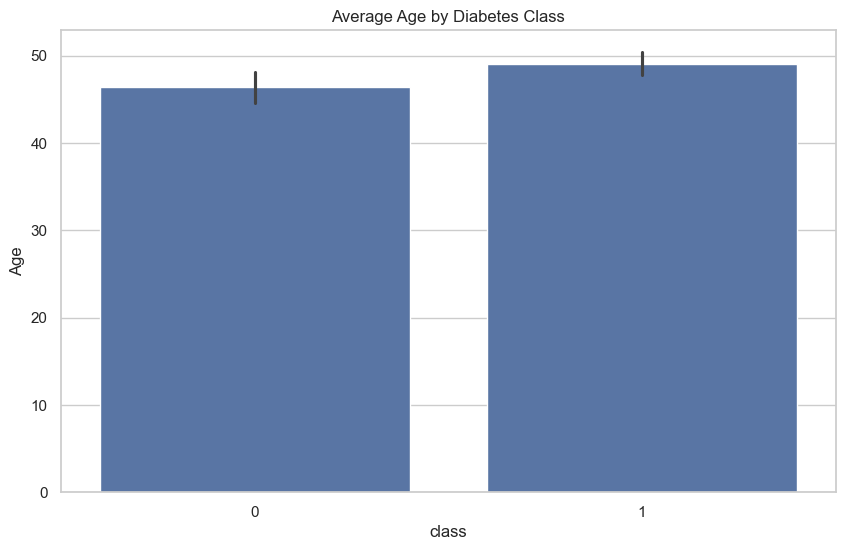

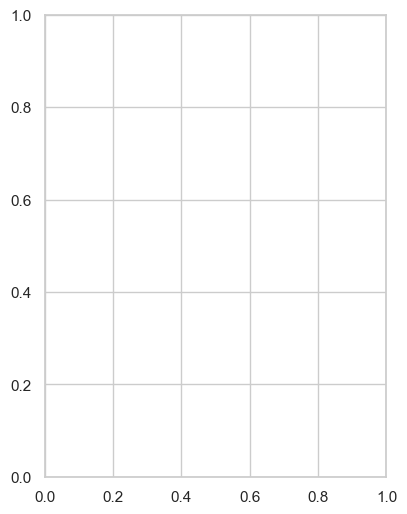

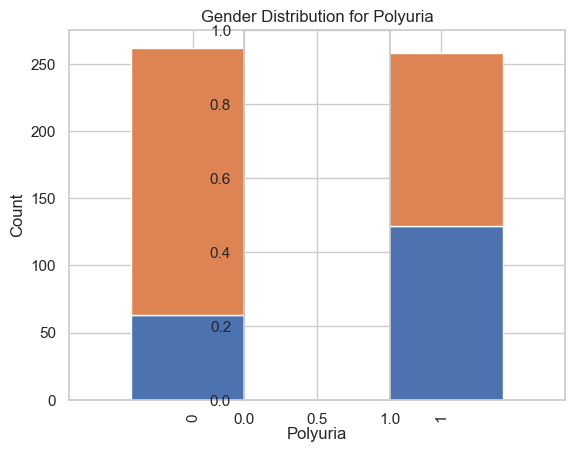

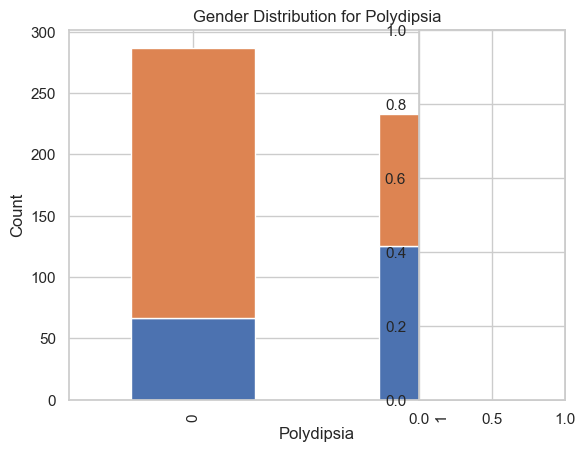

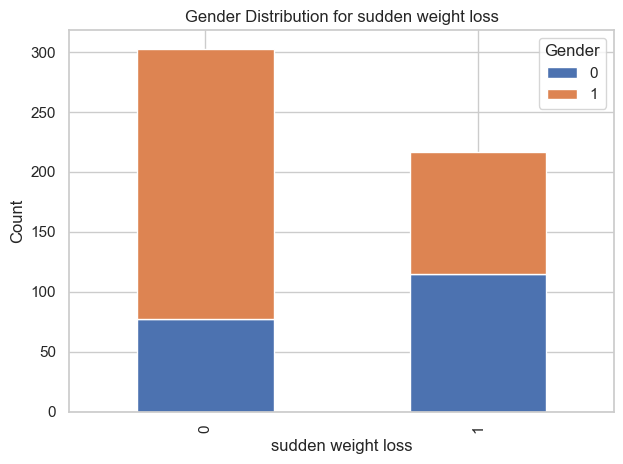

In [7]:
# Create scatter plots for age vs symptoms with class coloring
plt.figure(figsize=(15, 10))
for idx, symptom in enumerate(['Polyuria', 'Polydipsia', 'weakness', 'Polyphagia']):
    plt.subplot(2, 2, idx+1)
    sns.scatterplot(data=df, x='Age', y=symptom, hue='class', alpha=0.6)
    plt.title(f'Age vs {symptom}')
plt.tight_layout()
plt.show()

# Bar plot comparing average age between diabetes classes
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='class', y='Age')
plt.title('Average Age by Diabetes Class')
plt.show()

# Create stacked bar plots for gender distribution across symptoms
plt.figure(figsize=(15, 6))
symptoms_gender = ['Polyuria', 'Polydipsia', 'sudden weight loss']
for idx, symptom in enumerate(symptoms_gender):
    plt.subplot(1, 3, idx+1)
    df_grouped = df.groupby([symptom, 'Gender']).size().unstack()
    df_grouped.plot(kind='bar', stacked=True)
    plt.title(f'Gender Distribution for {symptom}')
    plt.xlabel(symptom)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

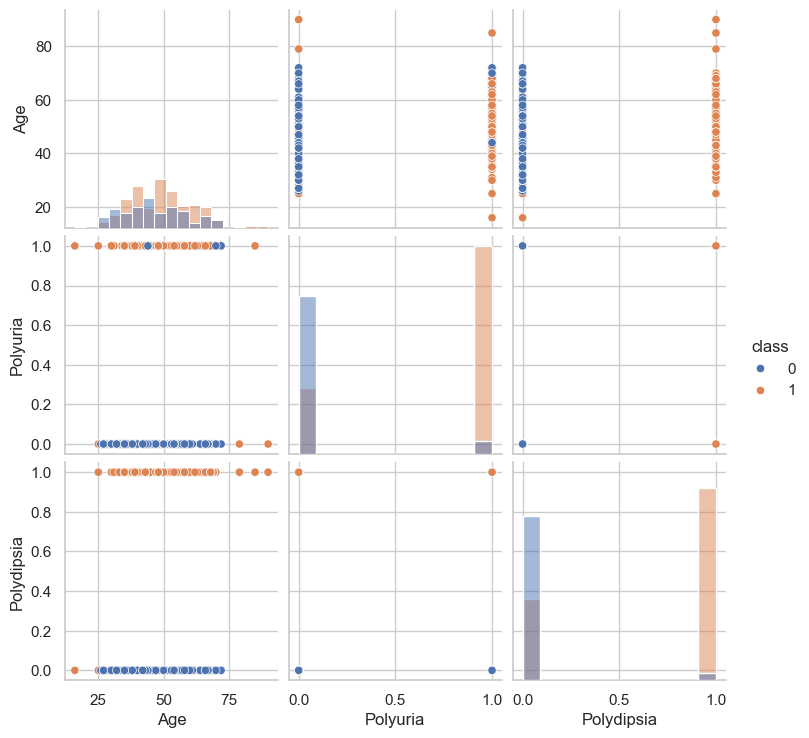

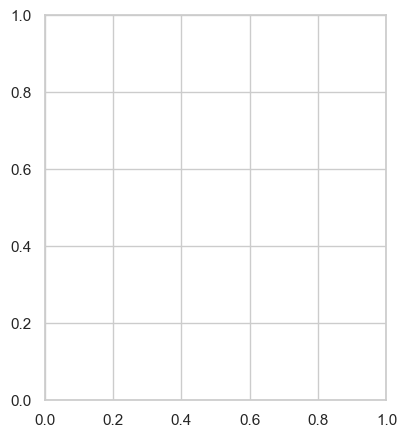

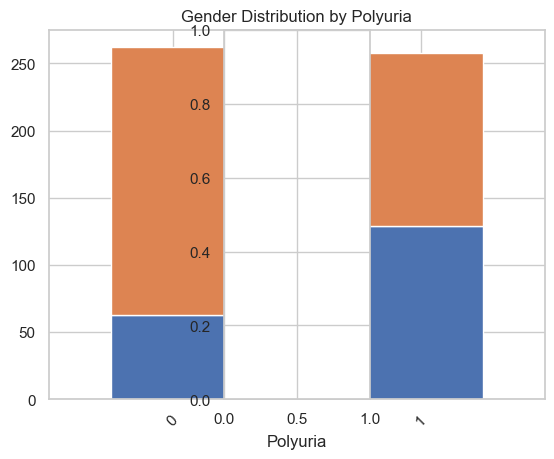

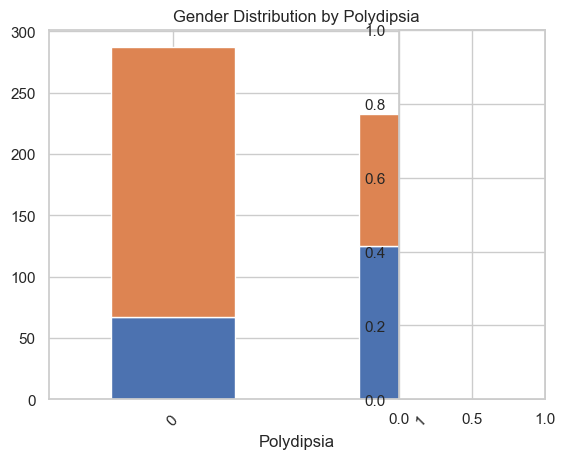

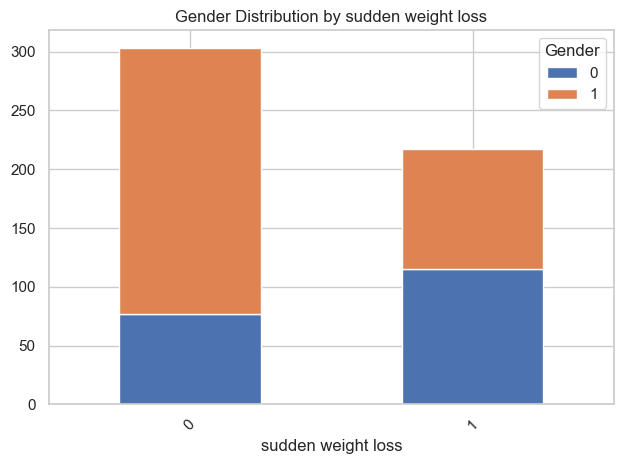

In [9]:
# Create pair plot for selected features
selected_features = ['Age', 'Polyuria', 'Polydipsia', 'class']
sns.pairplot(df[selected_features], hue='class', diag_kind='hist')
plt.show()

# Create stacked bar plots for gender distribution
plt.figure(figsize=(15, 5))
gender_features = ['Polyuria', 'Polydipsia', 'sudden weight loss']
for idx, feature in enumerate(gender_features):
    plt.subplot(1, 3, idx+1)
    pd.crosstab(df[feature], df['Gender']).plot(kind='bar', stacked=True)
    plt.title(f'Gender Distribution by {feature}')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features_mask = selector.get_support()
selected_features = X_train.columns[selected_features_mask].tolist()

# Print selected features and their scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Score': selector.scores_
})
print("Top 10 Most Important Features:")
print(feature_scores.sort_values('Score', ascending=False).head(10))

Top 10 Most Important Features:
               Feature       Score
2             Polyuria  352.058666
3           Polydipsia  306.613433
4   sudden weight loss  108.943204
1               Gender  100.098402
12     partial paresis   86.669972
10        Irritability   42.929536
6           Polyphagia   41.019043
14            Alopecia   31.163551
8      visual blurring   27.233905
5             weakness   24.051560


In [11]:
# Train and evaluate classification models

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train Logistic Regression
logistic_regression.fit(X_train_selected, y_train)
y_pred_lr = logistic_regression.predict(X_test_selected)

# Train Decision Tree
decision_tree.fit(X_train_selected, y_train)
y_pred_dt = decision_tree.predict(X_test_selected)

# Train Random Forest
random_forest.fit(X_train_selected, y_train)
y_pred_rf = random_forest.predict(X_test_selected)

# Evaluate models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification report for Random Forest
print("\
Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
print("\
Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.875
Decision Tree Accuracy: 0.9711538461538461
Random Forest Accuracy: 0.9807692307692307
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.99      0.99      0.99        71

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

Random Forest Confusion Matrix:
[[32  1]
 [ 1 70]]


In [12]:
# Conduct statistical tests
from scipy import stats

# Chi-square tests for categorical variables
categorical_vars = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
                   'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
                   'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

print("Chi-square test results:")
for var in categorical_vars:
    contingency = pd.crosstab(df[var], df['class'])
    chi2, p_value = stats.chi2_contingency(contingency)[:2]
    print(f"{var}:")
    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_value:.4e}\
")

# T-test for Age between diabetes classes
age_diabetic = df[df['class'] == 1]['Age']
age_non_diabetic = df[df['class'] == 0]['Age']
t_stat, p_value = stats.ttest_ind(age_diabetic, age_non_diabetic)

print("T-test results for Age:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4e}")

Chi-square test results:
Polyuria:
Chi-square statistic: 227.8658
p-value: 1.7409e-51
Polydipsia:
Chi-square statistic: 216.1716
p-value: 6.1870e-49
sudden weight loss:
Chi-square statistic: 97.2963
p-value: 5.9692e-23
weakness:
Chi-square statistic: 29.7679
p-value: 4.8698e-08
Polyphagia:
Chi-square statistic: 59.5953
p-value: 1.1652e-14
Genital thrush:
Chi-square statistic: 5.7921
p-value: 1.6098e-02
visual blurring:
Chi-square statistic: 31.8085
p-value: 1.7015e-08
Itching:
Chi-square statistic: 0.0462
p-value: 8.2975e-01
Irritability:
Chi-square statistic: 45.2083
p-value: 1.7715e-11
delayed healing:
Chi-square statistic: 0.9621
p-value: 3.2666e-01
partial paresis:
Chi-square statistic: 95.3876
p-value: 1.5653e-22
muscle stiffness:
Chi-square statistic: 7.2887
p-value: 6.9391e-03
Alopecia:
Chi-square statistic: 36.0641
p-value: 1.9093e-09
Obesity:
Chi-square statistic: 2.3275
p-value: 1.2711e-01
T-test results for Age:
t-statistic: 2.4882
p-value: 1.3151e-02


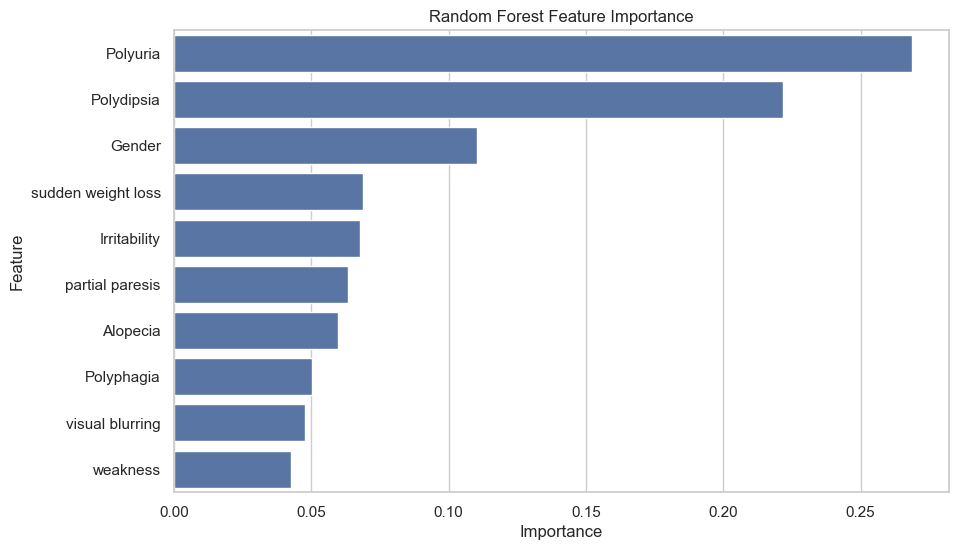

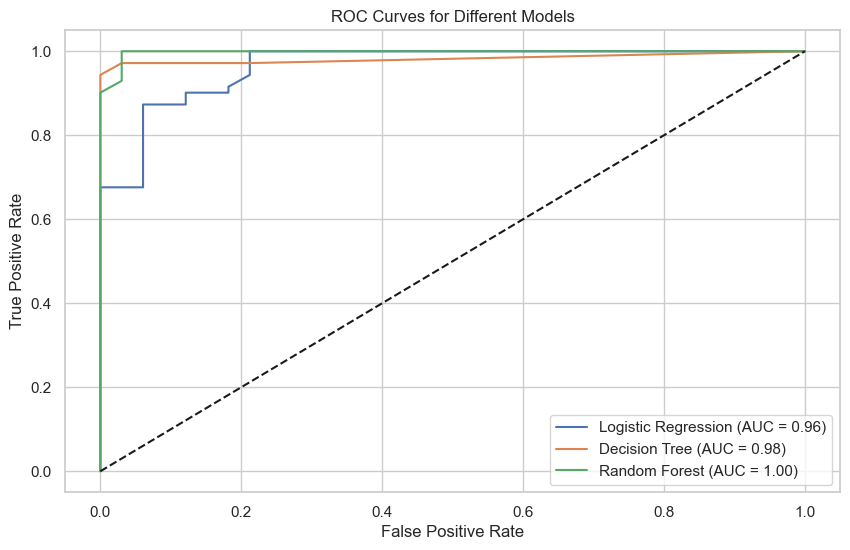

In [13]:
# Visualize feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': random_forest.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.show()

# Plot ROC curves
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Get probabilities for ROC curves
y_prob_lr = logistic_regression.predict_proba(X_test_selected)[:, 1]
y_prob_dt = decision_tree.predict_proba(X_test_selected)[:, 1]
y_prob_rf = random_forest.predict_proba(X_test_selected)[:, 1]

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# Calculate AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.show()

In [14]:
# Perform hyperparameter tuning on the Random Forest model using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_selected, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.9423121055651176


In [15]:
# Retrain the Random Forest model with the best parameters
best_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

# Fit the model
best_rf.fit(X_train_selected, y_train)

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test_selected)

# Evaluate the model
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)

# Print the accuracy
print("Best Random Forest Model Accuracy:", best_rf_accuracy)

# Print classification report
print("\
Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Print confusion matrix
print("\
Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_rf))

Best Random Forest Model Accuracy: 0.9807692307692307
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.99      0.99      0.99        71

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

Confusion Matrix:
[[32  1]
 [ 1 70]]


In [16]:
# Perform cross-validation to validate the model's performance
from sklearn.model_selection import cross_val_score

# Cross-validation with 10 folds
cv_scores = cross_val_score(best_rf, X_train_selected, y_train, cv=10, scoring='accuracy')

# Print cross-validation results
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())
print("Standard Deviation of Cross-validation Accuracy:", cv_scores.std())

Cross-validation Accuracy Scores: [0.95238095 0.97619048 0.95238095 0.92857143 0.9047619  0.95238095
 0.87804878 0.95121951 0.92682927 0.97560976]
Mean Cross-validation Accuracy: 0.9398373983739837
Standard Deviation of Cross-validation Accuracy: 0.029235320549755268


Dataset Overview:
Shape of the dataset: (520, 17)
Feature Types:
Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object
Class Distribution:
class
1    320
0    200
Name: count, dtype: int64


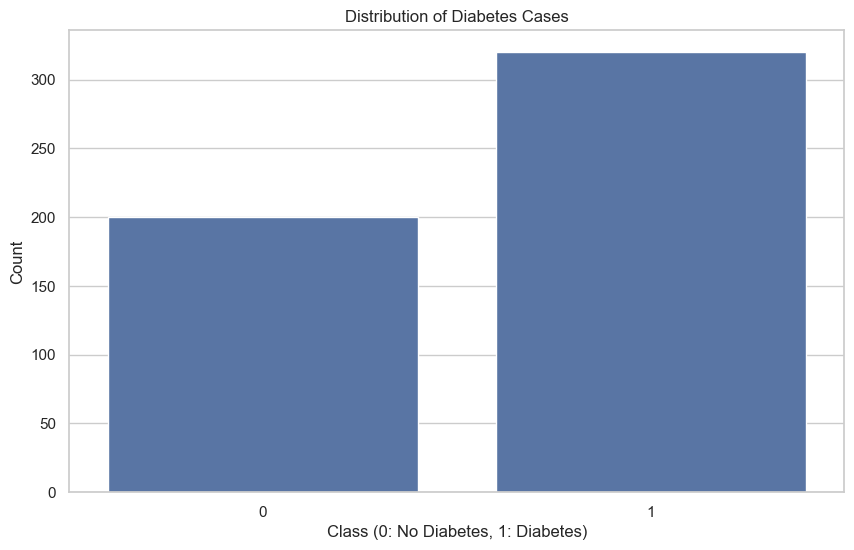

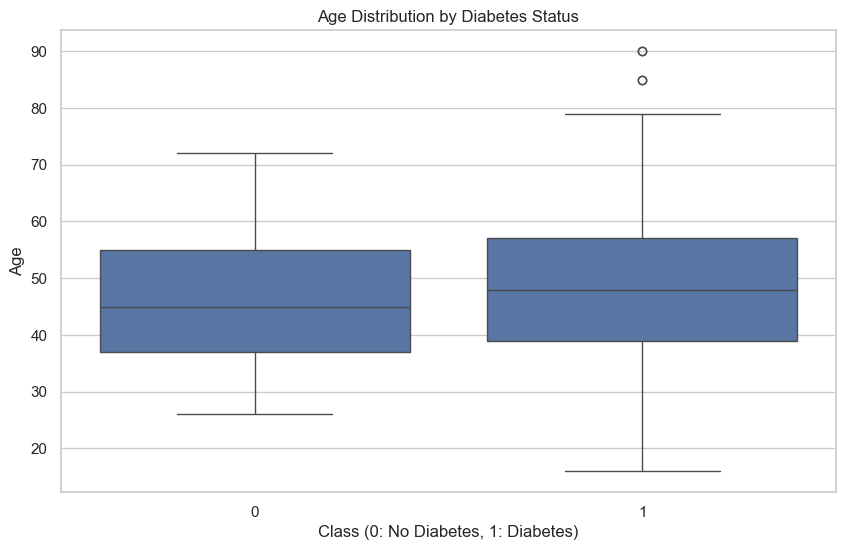

Top Feature Correlations with Diabetes:
class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching              -0.013384
Alopecia             -0.267512
Gender               -0.449233
Name: class, dtype: float64


In [17]:
# Generate comprehensive summary statistics and visualizations for the final report

# 1. Dataset Overview
print("Dataset Overview:")
print("\
Shape of the dataset:", df.shape)
print("\
Feature Types:")
print(df.dtypes)

# 2. Class Distribution
class_dist = df['class'].value_counts()
print("\
Class Distribution:")
print(class_dist)

# Create visualization for class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class')
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Class (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

# 3. Age Distribution by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='Age', data=df)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Class (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Age')
plt.show()

# 4. Top Symptoms Correlation with Diabetes
correlations = df.corr()['class'].sort_values(ascending=False)
print("\
Top Feature Correlations with Diabetes:")
print(correlations)